In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oli = datasets.fetch_olivetti_faces()
oli

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [3]:
oli['data'].shape

(400, 4096)

In [4]:
oli['images'].shape

(400, 64, 64)

In [5]:
oli['target'].shape

(400,)

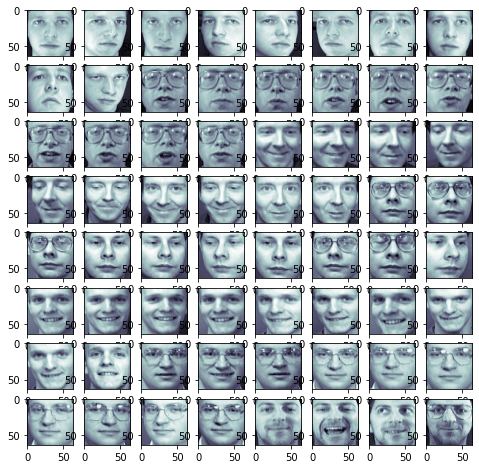

In [6]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8 ,i+1)
    ax.imshow(oli.images[i], cmap=plt.cm.bone)
plt.show()

In [7]:
x = oli.data
y = oli.target

In [8]:
pca = PCA()
pca.fit(x)

PCA()

In [10]:
pca.components_.shape

(400, 4096)

In [16]:
k = 0
total= sum(pca.explained_variance_)
currsum = 0
while currsum/total < 0.95:
    currsum += pca.explained_variance_[k] 
    k=k+1
k
        

123

In [17]:
pca = PCA(n_components=k)
t = pca.fit_transform(x)
t.shape

(400, 123)

In [18]:
xa = pca.inverse_transform(t)
xa.shape

(400, 4096)

In [20]:
xareshape = xa.reshape((400,64,64))
xareshape.shape

(400, 64, 64)

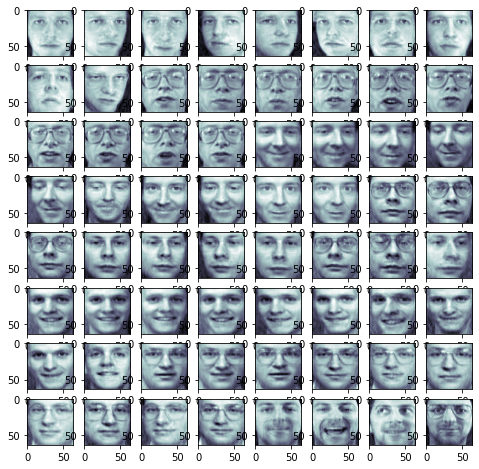

In [22]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8 ,i+1)
    ax.imshow(xareshape[i], cmap=plt.cm.bone)
plt.show()

In [23]:
oli['data']

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [24]:
xa

array([[0.32176113, 0.40525296, 0.42735294, ..., 0.17736593, 0.15751174,
        0.19769958],
       [0.5068759 , 0.48300254, 0.5000893 , ..., 0.13162021, 0.15636165,
        0.09917729],
       [0.28627428, 0.34768414, 0.44818974, ..., 0.17185757, 0.14760232,
        0.15026404],
       ...,
       [0.47393847, 0.5242862 , 0.5855821 , ..., 0.18806589, 0.16365294,
        0.18221596],
       [0.27784973, 0.29630637, 0.2911682 , ..., 0.55632734, 0.5779569 ,
        0.5628269 ],
       [0.4316892 , 0.4153438 , 0.3359515 , ..., 0.33630407, 0.3111225 ,
        0.38763174]], dtype=float32)

In [26]:
oli['data']-xa * -1

array([[0.63167846, 0.7730216 , 0.8447083 , ..., 0.3302585 , 0.31866878,
        0.35472438],
       [0.9614214 , 0.9540769 , 1.012486  , ..., 0.28451276, 0.30925423,
        0.25206983],
       [0.60445607, 0.7485106 , 0.9399253 , ..., 0.31235343, 0.29636264,
        0.3031566 ],
       ...,
       [0.97393847, 1.0573441 , 1.1930201 , ..., 0.36575183, 0.31241328,
        0.3722986 ],
       [0.49272576, 0.51531464, 0.5101765 , ..., 1.1307075 , 1.1688659 ,
        1.1661327 ],
       [0.9482181 , 0.8781537 , 0.61694324, ..., 0.6958082 , 0.66649437,
        0.77192926]], dtype=float32)

In [27]:
pca.components_.shape

(123, 4096)

In [28]:
eigen = pca.components_.reshape(k,64,64)

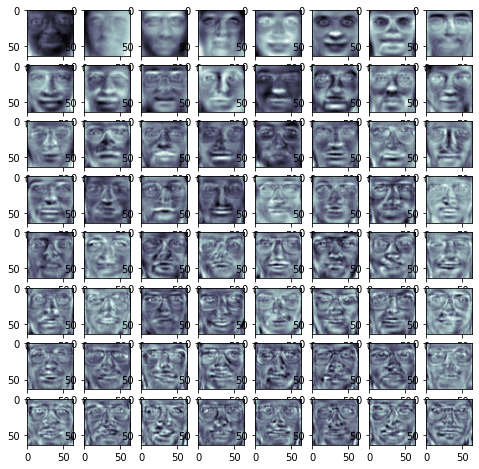

In [29]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8 ,i+1)
    ax.imshow(eigen[i], cmap=plt.cm.bone)
plt.show()